### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car

How well those variables describe the price of a car


### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. 


### Model Evaluation

Calculate the R-squared score on the test set.


### Steps Followed

##### 1. Read and Understand Data
##### 2. Visualize the Data
##### 3. Data Preparation
##### 4. Building the model
##### 5. Residual Analysis of the train data
##### 6. Making Predictions
##### 7. Conclusion





Let us start by importing pandas and numpy !

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### 1. Read and Understand Data

In [2]:
car = pd.read_csv("CarPrice_Assignment.csv")

Basic Data exploration

In [3]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.shape

(205, 26)

There are 205 data items in the data set

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### There are no missing values in the data set

From the dictionary file ( please see "Data Dictionary - carprices.xlsx" ), symboling seems to be an Ordinal categorical type.

In [6]:
print(car['symboling'].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


In [7]:
# Let us drop the car_ID variable which looks useless to analysis.
car_original = car.copy()
car = car.drop("car_ID", axis=1)

In [8]:
# Convert Symboling to object type from int64 as it is actually a categorical variable.
#car['symboling'] = car['symboling'].astype('object')

In [9]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Looking at the mean, median, max etc , looks like the distribution of numerical attributes don't have severe outliers.

##### Convert text categorical variables to lower string

In [10]:
car_categorical = car.select_dtypes(include=['object'])
car_categorical.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [11]:
car.update(car.select_dtypes(include='object')\
    .apply(lambda x: x.astype(str).str.lower()))

In [12]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
print(car['CarName'].value_counts())

toyota corona              6
toyota corolla             6
peugeot 504                6
subaru dl                  4
mitsubishi mirage g4       3
                          ..
toyota cressida            1
volkswagen super beetle    1
buick opel isuzu deluxe    1
plymouth valiant           1
mazda glc custom l         1
Name: CarName, Length: 147, dtype: int64


In [14]:
#car['CarName'].loc[car["CarName"].str.startswith('N')]

There is a variable named CarName which is comprised of two parts - 
the first word is the name of 'car company' and the second is the 'car model'.
For example, chevrolet impala has 'chevrolet' as the car company name and 
'impala' as the car model name. 
Let's consider only company name as the independent variable for model building. 

In [15]:
car['CarName'] = car['CarName'].apply(lambda x: x.split()[0])

In [16]:
#car.CarName.value_counts()
sorted(dict(car.CarName.value_counts()).items())

[('alfa-romero', 3),
 ('audi', 7),
 ('bmw', 8),
 ('buick', 8),
 ('chevrolet', 3),
 ('dodge', 9),
 ('honda', 13),
 ('isuzu', 4),
 ('jaguar', 3),
 ('maxda', 2),
 ('mazda', 15),
 ('mercury', 1),
 ('mitsubishi', 13),
 ('nissan', 18),
 ('peugeot', 11),
 ('plymouth', 7),
 ('porcshce', 1),
 ('porsche', 4),
 ('renault', 2),
 ('saab', 6),
 ('subaru', 12),
 ('toyota', 31),
 ('toyouta', 1),
 ('vokswagen', 1),
 ('volkswagen', 9),
 ('volvo', 11),
 ('vw', 2)]

The following car companies' names are kind of duplicated - mazda as maxda, porsche as porcshce, toyota as toyouta, volkswagen as vokswagen. We need to correct these.

In [17]:
car['CarName'] = car['CarName'].apply(lambda x: x.replace('maxda', 'mazda'))
car['CarName'] = car['CarName'].apply(lambda x: x.replace('porcshce', 'porsche'))
car['CarName'] = car['CarName'].apply(lambda x: x.replace('toyouta', 'toyota'))
#car['CarName'] = car['CarName'].apply(lambda x: x.replace('vokswagen', 'volkswagen'))

car.loc[(car['CarName'] == "vw") | (car['CarName'] == "vokswagen"), 'CarName'] = 'volkswagen'

In [18]:
sorted(dict(car.CarName.value_counts()).items())

[('alfa-romero', 3),
 ('audi', 7),
 ('bmw', 8),
 ('buick', 8),
 ('chevrolet', 3),
 ('dodge', 9),
 ('honda', 13),
 ('isuzu', 4),
 ('jaguar', 3),
 ('mazda', 17),
 ('mercury', 1),
 ('mitsubishi', 13),
 ('nissan', 18),
 ('peugeot', 11),
 ('plymouth', 7),
 ('porsche', 5),
 ('renault', 2),
 ('saab', 6),
 ('subaru', 12),
 ('toyota', 32),
 ('volkswagen', 12),
 ('volvo', 11)]

### 2. Visualize the Data

#### Numerical Data

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'carwidth'}>],
       [<AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>,
        <AxesSubplot:title={'center':'boreratio'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peakrpm'}>],
       [<AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

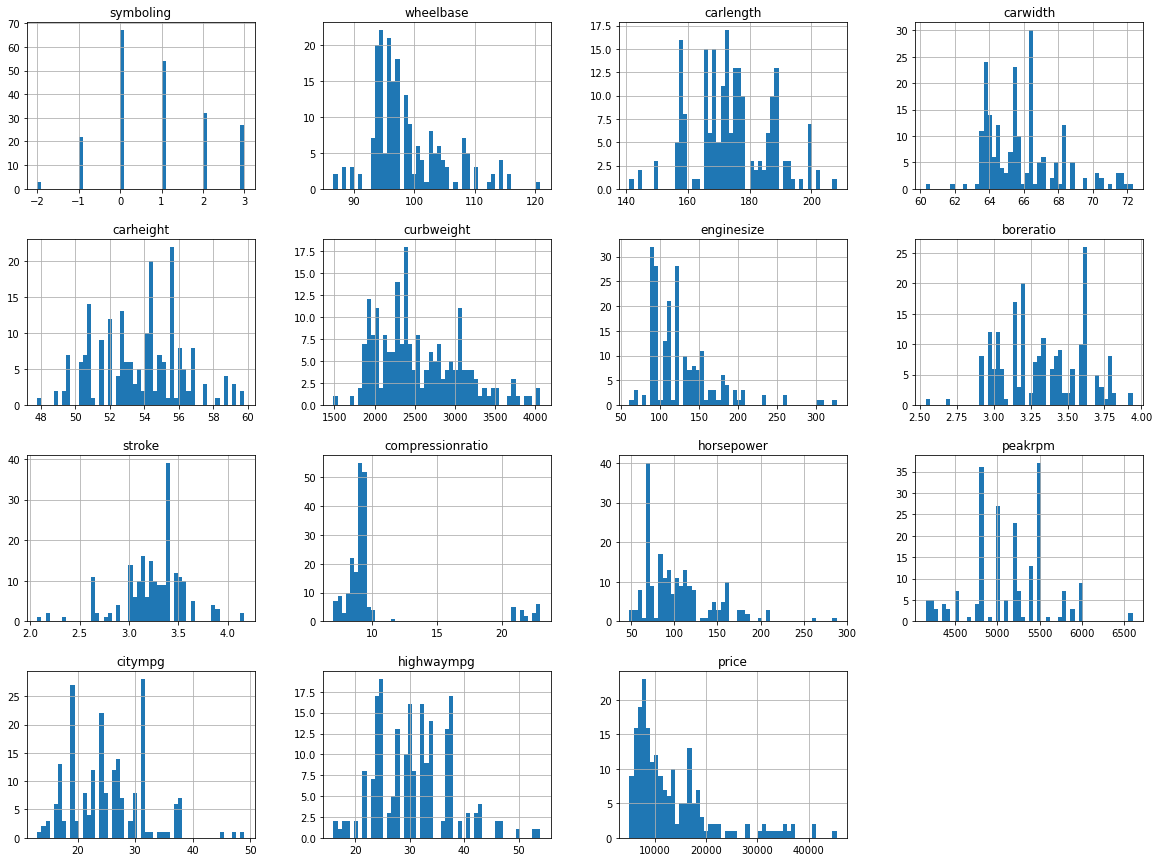

In [19]:
#%matplotlib inline 
import matplotlib.pyplot as plt

car.hist(bins=50, figsize=(20,15))

#### Observations :
    1. enginesize, compressionratio, horsepower, peakrpm, citympg have some extreme outliers.
    2. The attributes are different in scale.
    3. The target variable price is skewed to the right and has extreme outliers around 40000.
    
    

In [20]:
car.price.quantile([.25, .5, .75, .90, .92, .95, .97, .99]) 

0.25     7788.00
0.50    10295.00
0.75    16503.00
0.90    22563.00
0.92    27336.32
0.95    32472.40
0.97    35490.72
0.99    40802.72
Name: price, dtype: float64

##### Try removing outliers from the dataset with respect to price

In [21]:
len(car[car.price <= car.price.quantile(0.95)])

194

In [22]:
car = car[car.price <= car.price.quantile(.95)]
car.price.describe()

count      194.000000
mean     11921.632304
std       5682.728477
min       5118.000000
25%       7747.250000
50%       9984.000000
75%      15628.750000
max      32250.000000
Name: price, dtype: float64

In [23]:
car_numeric = car.select_dtypes(include=['float64', 'int64'])
car_numeric.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [24]:
car.shape

(194, 25)

##### Let us see the pair plots between price (dependent variable) and other numerical features

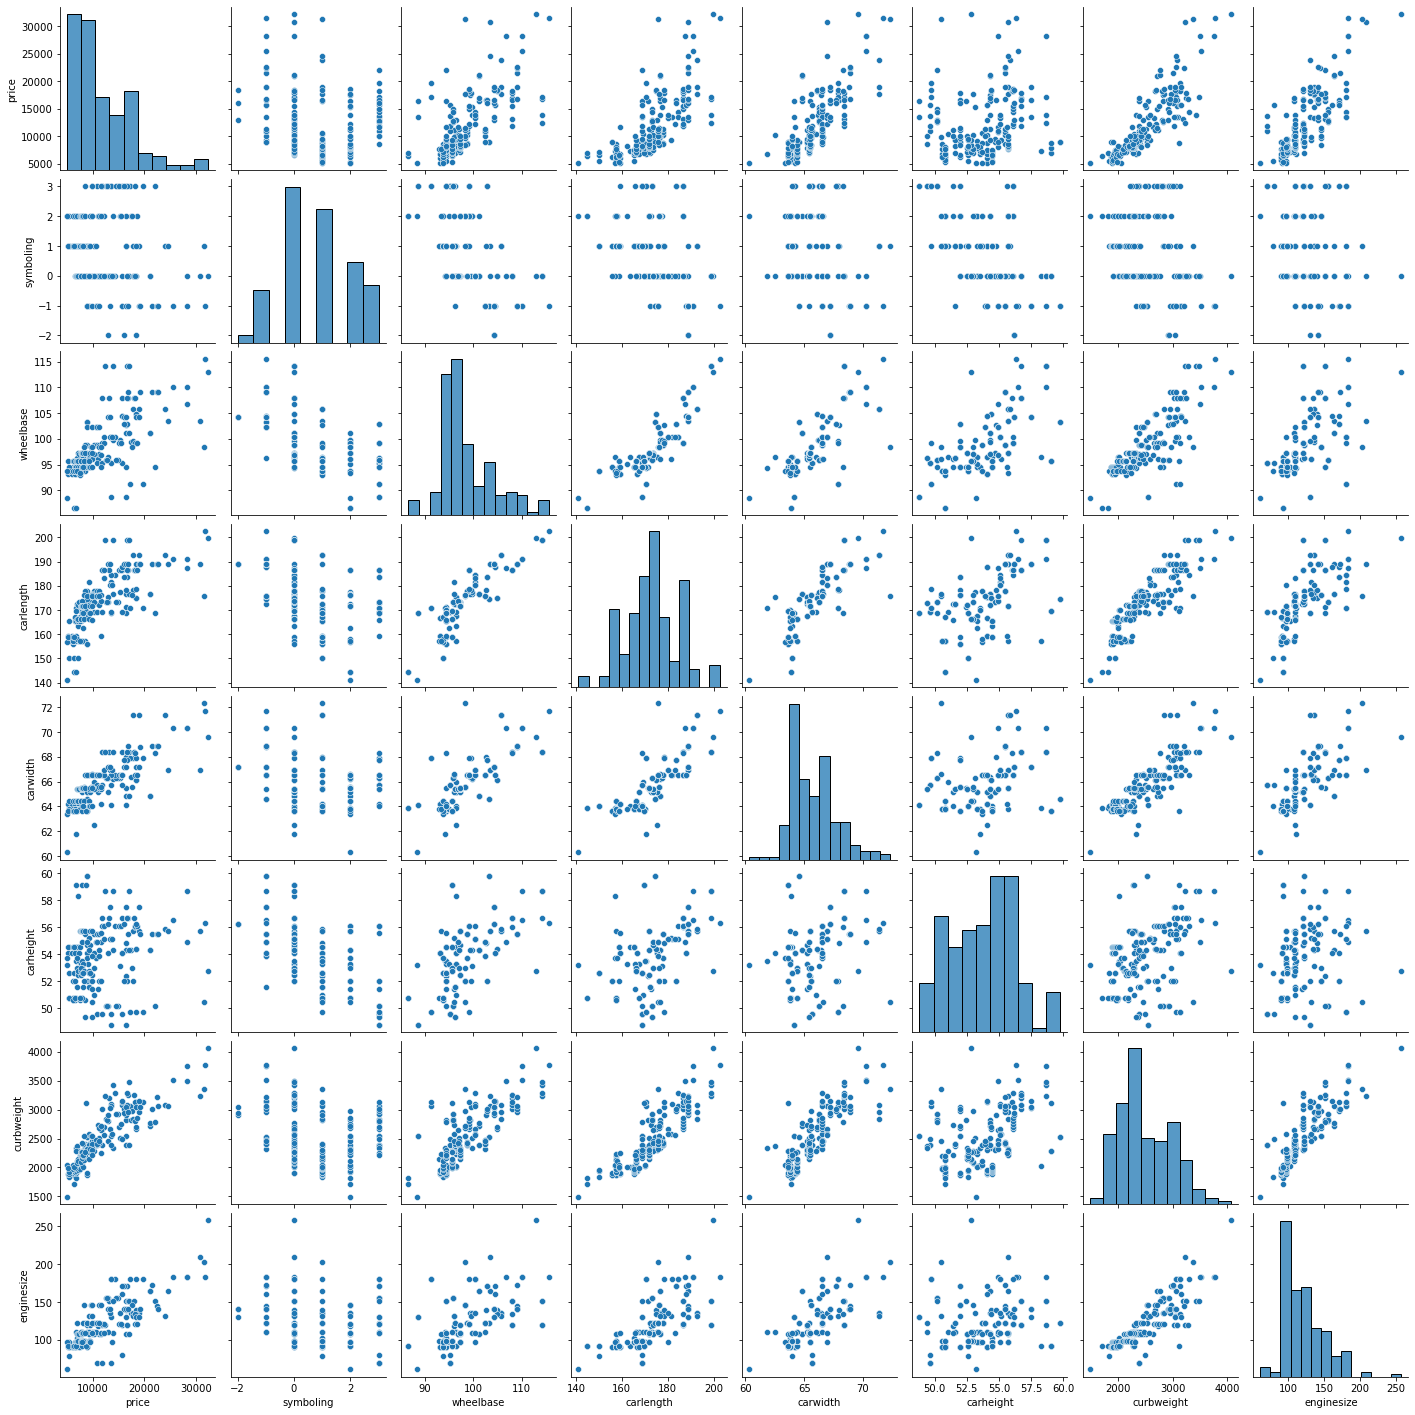

In [25]:
import seaborn as sns
attributes1 = ['price', 'symboling', 'wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize']
sns.pairplot(car[attributes1])

#### Except for carheight and symboling, all the other attributes seem to have good linear correlation with price.
Let us examine the remaining numerical attributes.

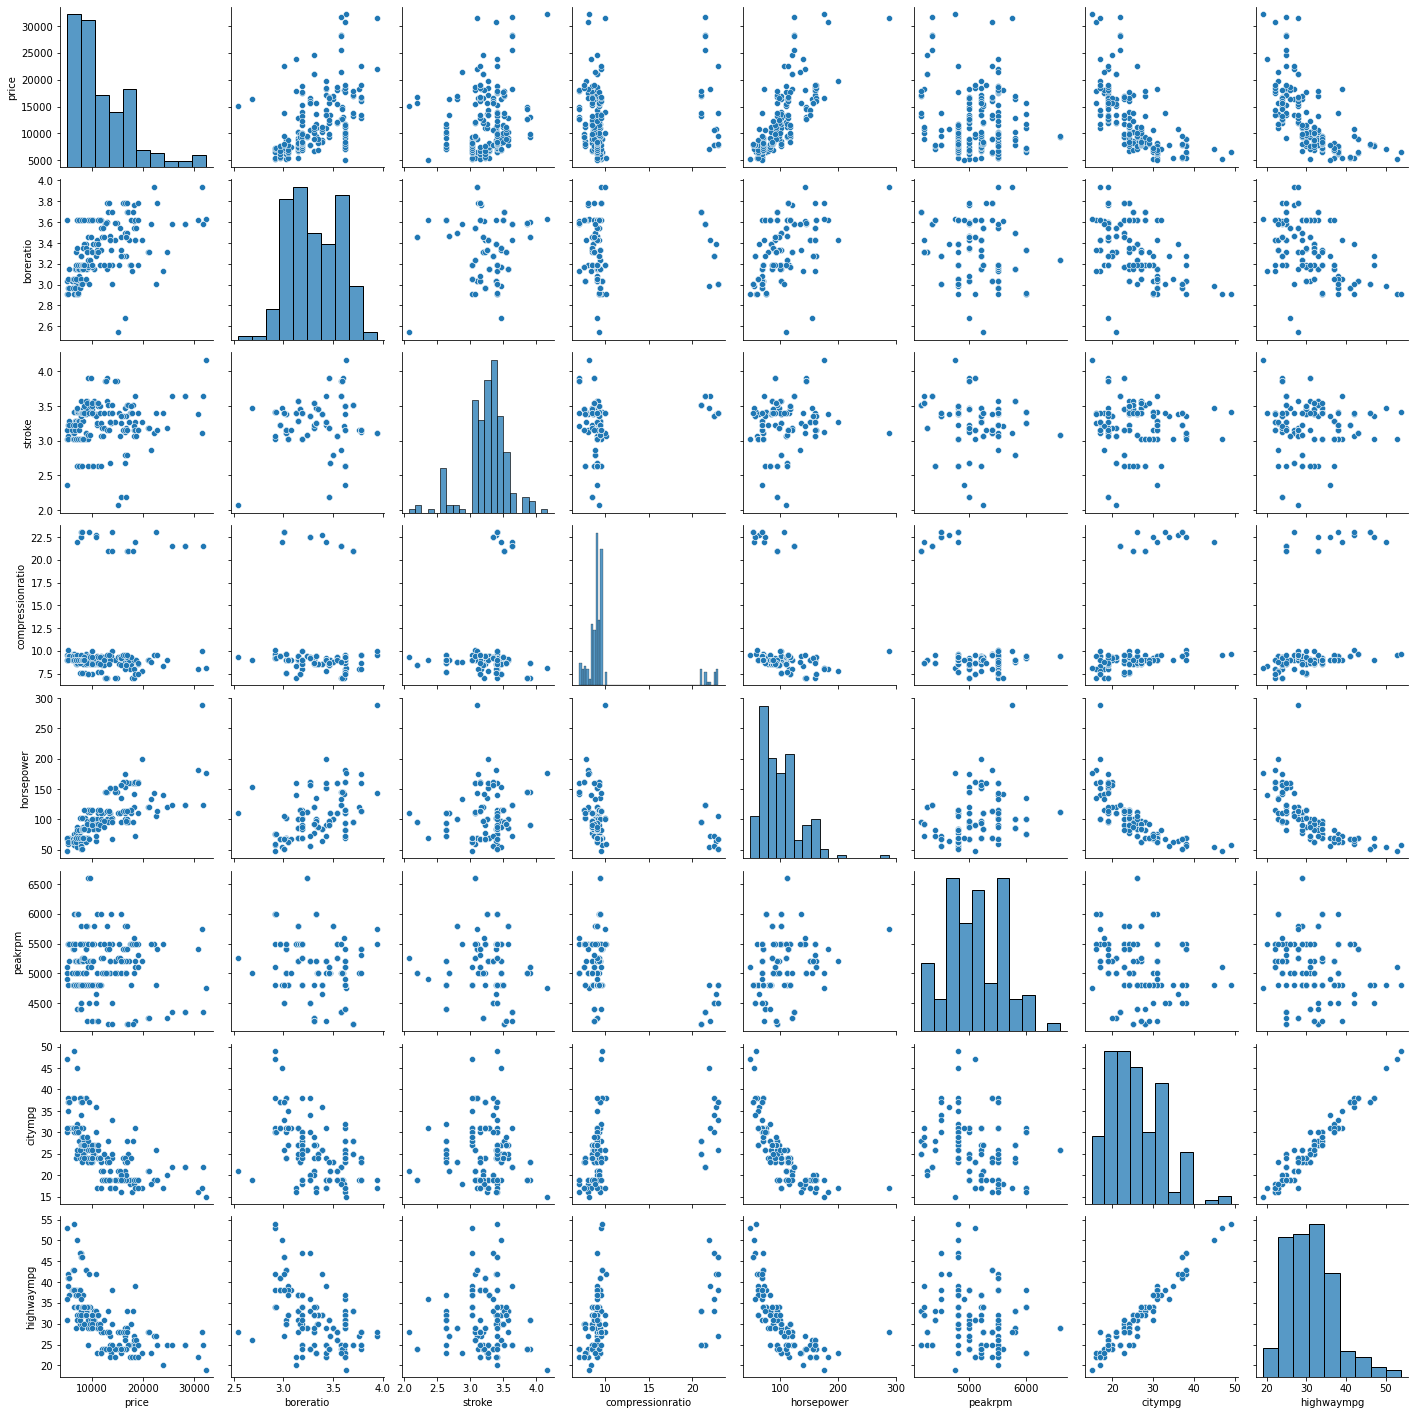

In [26]:
attributes2 = ['price','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
sns.pairplot(car[attributes2])

##### price seems to have 
Good positive correlation with horsepower. <br>
Some positive correlation with boreratio. <br>
Good negative correlation with citympg and highwaympg. <br>
Not good correlation with stroke, peakrpm and compressionratio.





##### Attributes that have good correlation with each other.
highwaympg and citympg have good positive correlation <br>
Both highwaympg and citympg have negative correlation with horsepower  

##### From the above plots, we see that the problem is well suited for Linear Regression modelling

Let's also look at the correlation matrix on how other numerical features are correlated with the target variable price.

In [27]:
corr_matrix = car.corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
curbweight          0.862629
carwidth            0.803368
enginesize          0.799518
horsepower          0.753907
carlength           0.725333
wheelbase           0.673514
boreratio           0.525557
carheight           0.219586
compressionratio    0.187024
stroke              0.143875
peakrpm            -0.126727
symboling          -0.159490
citympg            -0.664164
highwaympg         -0.670949
Name: price, dtype: float64

#### From above, we can see 
the following features have highest positive correlation with price -<br> 
curbweight, carwidth, enginesize, horsepower and carlength. <br><br>

the following features have highest negative correlation with price -<br> 
citympg (City mileage) and highwaympg (Highway mileage) <br>

So we get a feeling like prices are higher for cars with lower mileage and vice versa. Makes sense because usually city cars have higher mileage and lower prices..right ?


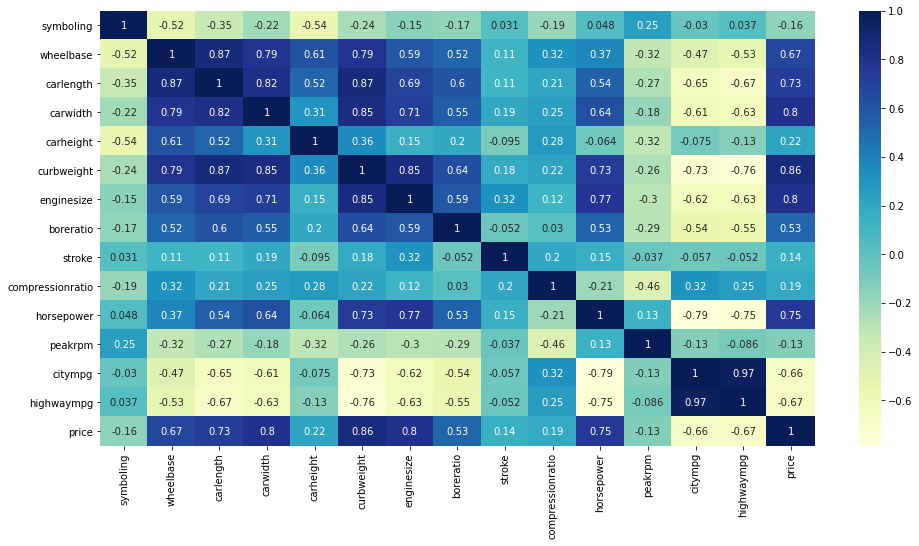

In [28]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

##### Above heatmap shows a lot of correlation between a number of features. 
So we can easily guess that not all the features will be needed for a successful model and there is good scope for feature elimination. 

#### Now let us look about Categorical Variables

In [29]:
car_categorical = car.select_dtypes(include=['object'])
car_categorical.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

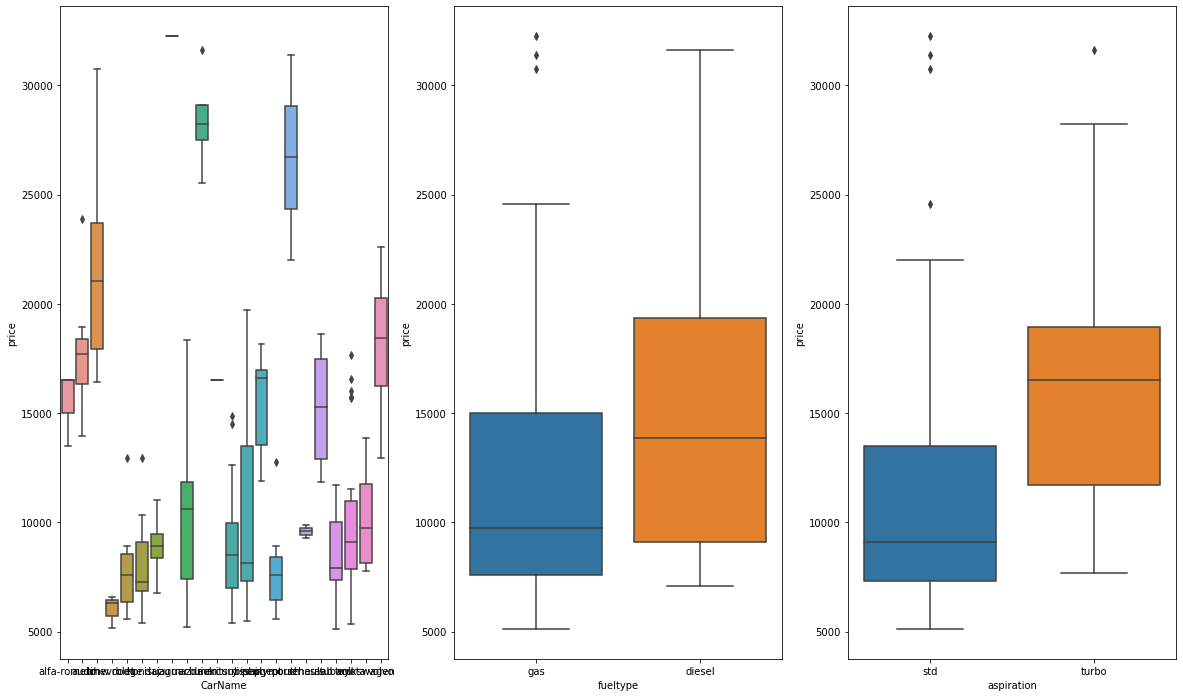

In [30]:
plt.figure(figsize=(20, 12))
#plt.subplot(1,3,1)
#sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.subplot(1,3,1)
sns.boxplot(x = 'CarName', y = 'price', data = car)
plt.subplot(1,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(1,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.show()

Diesel cars look generally costlier than gas.

<AxesSubplot:xlabel='CarName', ylabel='price'>

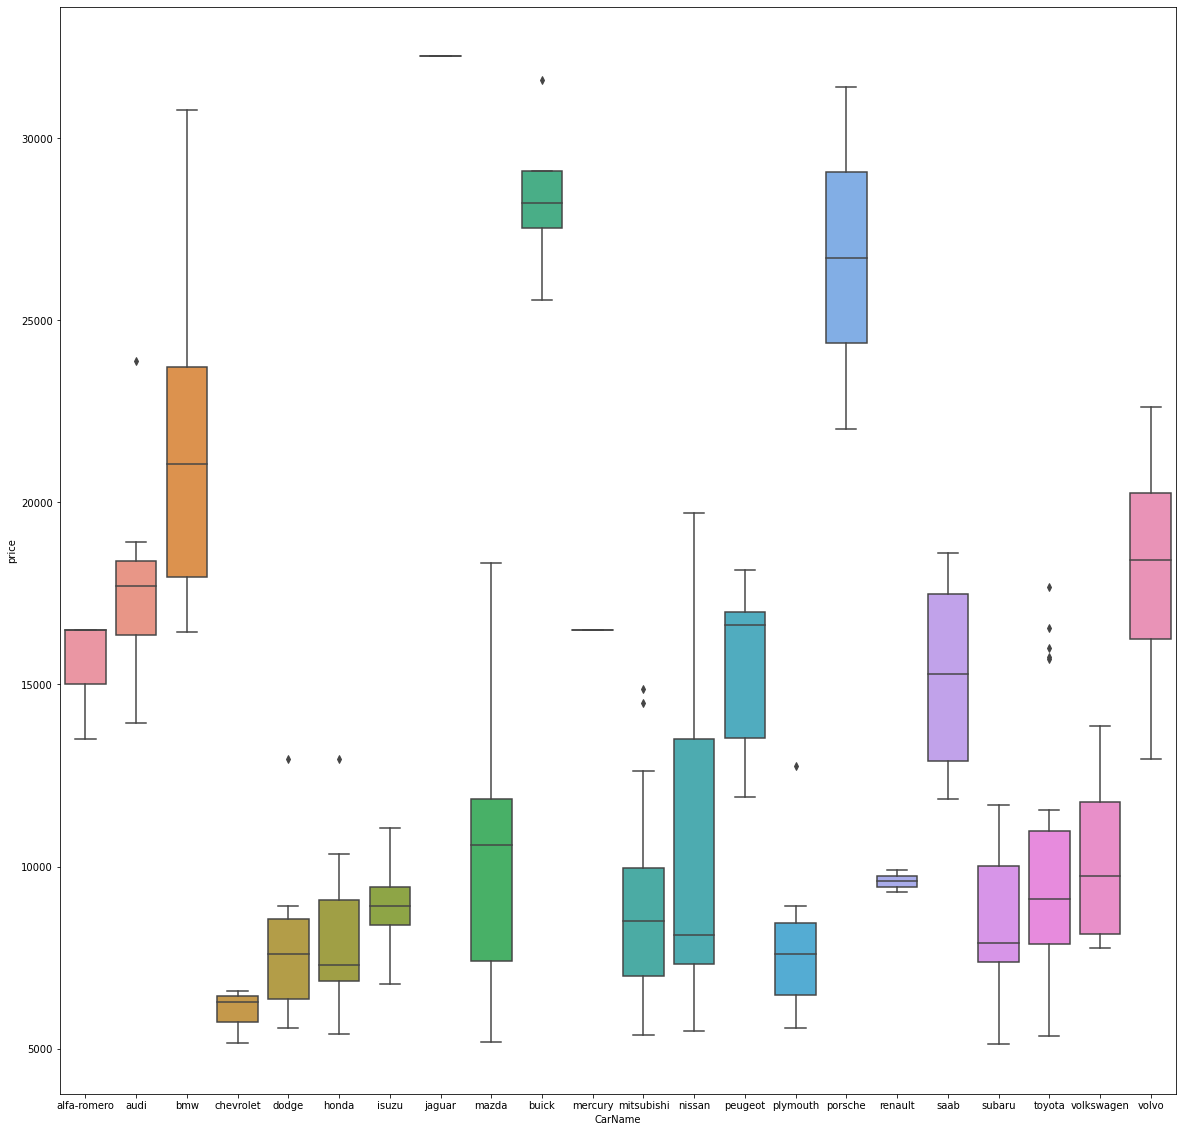

In [31]:
# Let us take a closer look at Car Companies

plt.figure(figsize=(20, 20))
sns.boxplot(x = 'CarName', y = 'price', data = car)

bmw, buick, porsche and volvo cars look costlier than others

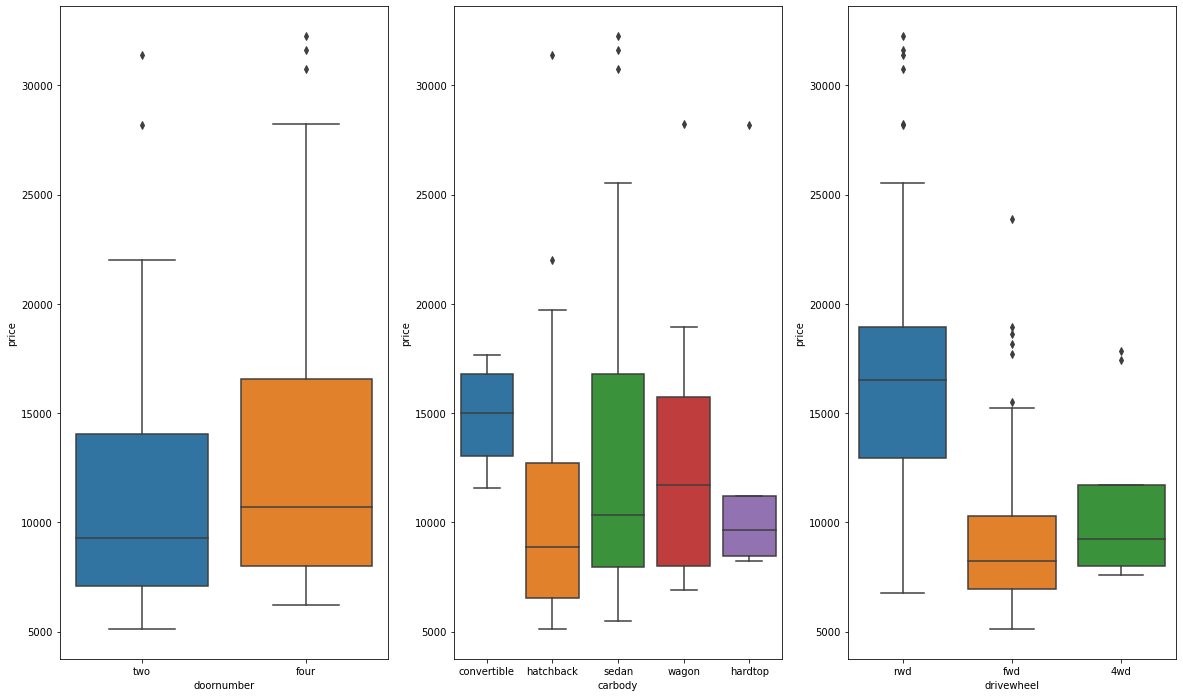

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(1,3,2)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(1,3,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.show()

Cars with four doors look costlier, likewise convertible and wagon cars

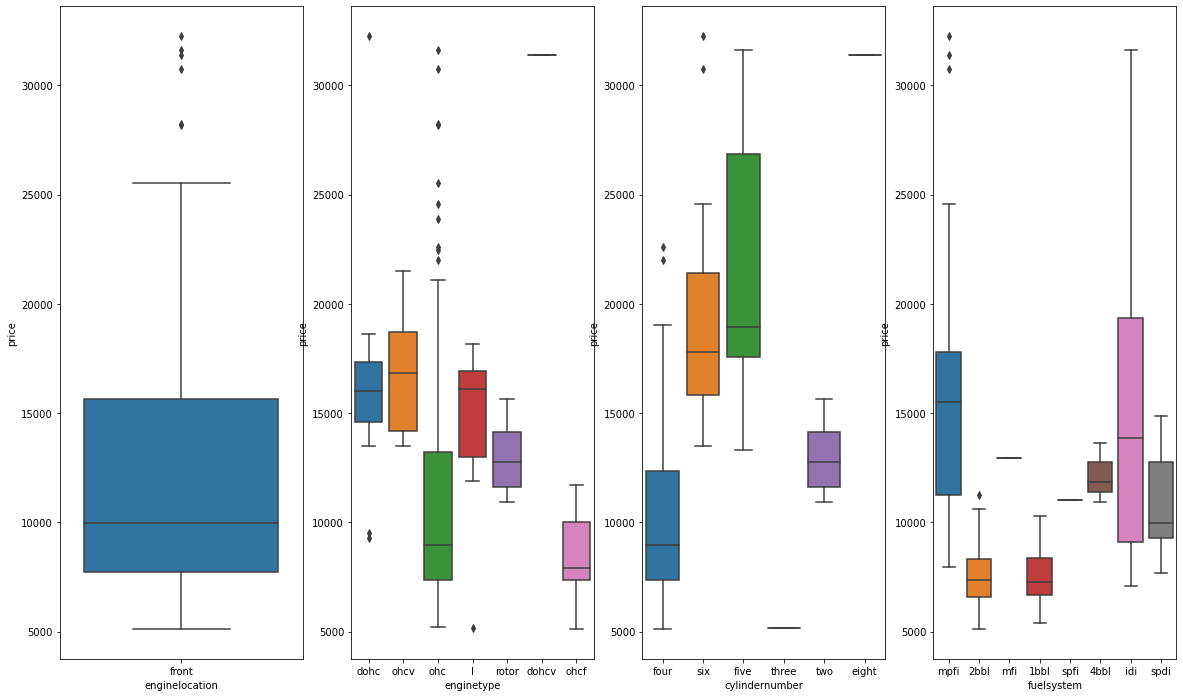

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(1,4,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(1,4,2)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(1,4,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(1,4,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

There seems to be only front enginelocation type in the data. Let's confirm it and drop the feature if it is the case, because it is not going to add value to modelling.

In [34]:
car.enginelocation.value_counts()

front    194
Name: enginelocation, dtype: int64

In [35]:
car = car.drop('enginelocation', axis=1)

In [36]:
car.shape

(194, 24)

### 3. Data Preparation

##### Apply one-hot encoding to the categorical variables 

In [37]:
car_categorical = car.select_dtypes(include=['object'])
car_categorical.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [38]:
car_categorical.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,ohc,five,mpfi


In [39]:
#category_list = car_categorical.columns
#print(category_list)

In [40]:
#dummy1 = pd.get_dummies(car_categorical[category_list], drop_first=True)
dummy1 = pd.get_dummies(car_categorical, drop_first=True)
dummy1                                       

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [41]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [42]:
# Add the results to the original housing dataframe
#housing = pd.concat([housing, status], axis = 1)
car = pd.concat([car, dummy1], axis = 1)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [43]:
# Drop categorical variables as we have created the dummies for it
#car.drop(category_list, axis = 1, inplace = True)
car.drop(car_categorical.columns, axis = 1, inplace = True)
car.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting the Data into Training and Testing Sets and rescaling

In [44]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

train_set, test_set = train_test_split(car, test_size=0.3, random_state=100)

In [45]:
#print(car.shape)
train_set.shape

(135, 63)

In [46]:
train_set.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
30,2,86.6,144.6,63.9,50.8,1713,92,2.91,3.41,9.6,...,0,0,0,0,0,0,0,0,0,0
112,0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,...,0,0,0,0,0,1,0,0,0,0
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,...,0,0,0,0,0,0,0,0,0,0
153,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,...,0,0,0,1,0,0,0,0,0,0
104,3,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,...,1,0,0,0,0,0,0,1,0,0
139,2,93.7,157.9,63.6,53.7,2120,108,3.62,2.64,8.7,...,0,0,0,1,0,0,0,0,0,0
136,3,99.1,186.6,66.5,56.1,2808,121,3.54,3.07,9.0,...,0,0,0,0,0,0,0,1,0,0
204,-1,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
135,2,99.1,186.6,66.5,56.1,2758,121,3.54,3.07,9.3,...,0,0,0,0,0,0,0,1,0,0
22,1,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.4,...,0,0,0,1,0,0,0,0,0,0


#### Rescaling the numerical features

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [48]:
numerical_vars = car_numeric.columns

In [49]:
train_set[numerical_vars] = scaler.fit_transform(train_set[numerical_vars])
train_set.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
30,0.995893,-2.142305,-2.360579,-0.981038,-1.266652,-1.702686,-0.925076,-1.515215,0.571832,-0.132004,...,0,0,0,0,0,0,0,0,0,0
112,-0.633750,1.623557,1.072820,1.291095,1.172633,1.494120,1.013635,1.337851,0.923746,2.794450,...,0,0,0,0,0,1,0,0,0,0
31,0.995893,-2.142305,-2.360579,-0.981038,-1.266652,-1.482503,-0.925076,-1.515215,0.571832,-0.234687,...,0,0,0,0,0,0,0,0,0,0
153,-0.633750,-0.533415,-0.313588,-1.132513,2.164884,-0.524915,-0.925076,-1.009608,-0.643874,-0.286028,...,0,0,0,1,0,0,0,0,0,0
104,1.810715,-1.311340,-0.232035,1.038636,-1.721434,1.118148,1.950678,0.362753,0.123940,-0.286028,...,1,0,0,0,0,0,0,1,0,0
139,0.995893,-0.887017,-1.275919,-1.132513,-0.067681,-0.857267,-0.408087,1.048933,-1.891571,-0.363040,...,0,0,0,1,0,0,0,0,0,0
136,1.810715,0.067708,1.064665,0.331750,0.924570,0.571845,0.011967,0.760015,-0.515905,-0.286028,...,0,0,0,0,0,0,0,1,0,0
204,-1.448572,1.835719,1.244083,1.543554,0.676507,1.099453,0.658204,1.626769,-0.259967,-0.157675,...,0,0,0,0,0,0,0,1,0,0
135,0.995893,0.067708,1.064665,0.331750,0.924570,0.467985,0.011967,0.760015,-0.515905,-0.209016,...,0,0,0,0,0,0,0,1,0,0
22,0.181071,-0.887017,-1.324851,-1.031530,-1.266652,-1.364103,-0.989700,-1.298526,-0.004029,-0.183346,...,0,0,0,1,0,0,0,0,0,0


In [50]:
train_set.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.0
mean,-1.106111e-16,1.195751e-15,7.730442e-16,3.513239e-15,-7.565964e-16,-4.473788e-16,-1.139007e-16,-9.317650e-16,6.529756e-16,-7.237009e-17,...,0.103704,0.007407,0.029630,0.296296,0.022222,0.096296,0.007407,0.459259,0.051852,0.0
std,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,...,0.306011,0.086066,0.170195,0.458324,0.147955,0.296096,0.086066,0.500193,0.222554,0.0
min,-2.263394e+00,-2.142305e+00,-2.646016e+00,-2.798744e+00,-2.093528e+00,-2.170056e+00,-1.926743e+00,-2.345854e+00,-3.331222e+00,-7.994412e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-6.337502e-01,-7.455765e-01,-5.704814e-01,-8.548083e-01,-7.705261e-01,-7.586001e-01,-7.635170e-01,-9.554359e-01,-3.879356e-01,-3.758754e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.810715e-01,-2.682137e-01,-2.815104e-02,-1.731683e-01,1.803815e-01,-2.465710e-01,-3.434630e-01,-7.062441e-02,7.595196e-02,-2.860281e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.958932e-01,4.389904e-01,7.955386e-01,5.337175e-01,7.591948e-01,8.024136e-01,6.582043e-01,9.947609e-01,5.398395e-01,-1.833455e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.810715e+00,2.984925e+00,2.369520e+00,3.260277e+00,2.164884e+00,3.184959e+00,4.438690e+00,2.204605e+00,3.003242e+00,3.307863e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### Dividing into X and Y sets for the model building

In [51]:
y_train = train_set.pop('price')
X_train = train_set
#X_train.columns

In [52]:

X_train.shape

(135, 62)

In [53]:
y_train

30    -1.038727
112    0.803852
31    -0.972245
153   -0.961106
104    0.856720
         ...   
95    -0.805333
111    0.570458
75     0.733657
26    -0.838927
8      2.037130
Name: price, Length: 135, dtype: float64

### 4. Building the model

##### Let us first use RFE to select the best 13 features ( coarse tuning ) as we saw a significant correlation between a number of features. Then we will go with manual removal of features one by one ( fine tuning ).

In [54]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [56]:
rfe = RFE(lr, 13)
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 41),
 ('wheelbase', False, 14),
 ('carlength', False, 13),
 ('carwidth', False, 12),
 ('carheight', False, 33),
 ('curbweight', True, 1),
 ('enginesize', False, 24),
 ('boreratio', False, 18),
 ('stroke', False, 43),
 ('compressionratio', False, 30),
 ('horsepower', False, 35),
 ('peakrpm', False, 40),
 ('citympg', False, 36),
 ('highwaympg', False, 37),
 ('CarName_audi', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 27),
 ('CarName_dodge', False, 44),
 ('CarName_honda', False, 3),
 ('CarName_isuzu', True, 1),
 ('CarName_jaguar', True, 1),
 ('CarName_mazda', False, 15),
 ('CarName_mercury', False, 31),
 ('CarName_mitsubishi', False, 46),
 ('CarName_nissan', False, 16),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 45),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 49),
 ('CarName_saab', True, 1),
 ('CarName_subaru', False, 25),
 ('CarName_toyota', False, 32),
 ('CarName_volkswagen', False

In [58]:
cols = X_train.columns[rfe.support_]

###### Features selected by RFE

In [59]:
cols

Index(['curbweight', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche',
       'CarName_saab', 'carbody_hardtop', 'carbody_wagon', 'drivewheel_rwd',
       'cylindernumber_three'],
      dtype='object')

###### Features NOT selected by RFE

In [60]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_plymouth',
       'CarName_renault', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hatchback',
       'carbody_sedan', 'drivewheel_fwd', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

##### Building model using statsmodel, for the detailed statistics. We will use only the RFE picked features.

In [61]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols]
X_train_rfe.shape

(135, 13)

In [62]:
# Adding a constant variable as statsmodels will not add it by default
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
X_train_lm.shape

(135, 14)

In [63]:
### Fit Statsmodels model
lm = sm.OLS(y_train, X_train_lm).fit()

In [64]:
### Print the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.39e-59
Time:                        22:11:48   Log-Likelihood:                -21.681
No. Observations:                 135   AIC:                             71.36
Df Residuals:                     121   BIC:                             112.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2239 

#### Observations
R-squared:                       0.919
Adj. R-squared:                  0.911
Prob (F-statistic):           1.39e-59

Both R2 and Adj.R2 look very good. Note the Prob (F-statistic). It looks good with a very low value ( < 0.05 ) and shows all the predictor variables together as a whole are significant.

##### cylindernumber_three seems to have high p-value of 0.191 which says this feature is insignificant.
Let's go and check VIF of the variables.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
X_train_new = X_train_lm.drop('const',axis=1)

In [67]:
X_train_new.columns

Index(['curbweight', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche',
       'CarName_saab', 'carbody_hardtop', 'carbody_wagon', 'drivewheel_rwd',
       'cylindernumber_three'],
      dtype='object')

In [68]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,drivewheel_rwd,2.02
0,curbweight,1.93
6,CarName_peugeot,1.45
2,CarName_bmw,1.16
3,CarName_buick,1.16
5,CarName_jaguar,1.14
10,carbody_wagon,1.12
7,CarName_porsche,1.09
12,cylindernumber_three,1.07
4,CarName_isuzu,1.05


##### VIF of all the features are in acceptable range i.e less than 5.

##### Let's drop cylindernumber_three which has a high p-value 

In [69]:
X = X.drop('cylindernumber_three',axis=1)
#X = X.drop('enginetype_dohcv', axis=1)

##### Again build a statsmodel fit on the reduced set of features

In [70]:
X_train_lm = sm.add_constant(X)
X_train_lm.columns

Index(['const', 'curbweight', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche',
       'CarName_saab', 'carbody_hardtop', 'carbody_wagon', 'drivewheel_rwd'],
      dtype='object')

In [71]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [72]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.97e-60
Time:                        22:11:48   Log-Likelihood:                -22.638
No. Observations:                 135   AIC:                             71.28
Df Residuals:                     122   BIC:                             109.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2272      0.046     

#### Observations
R-squared:                       0.918
Adj. R-squared:                  0.910
Prob (F-statistic):           2.97e-60

A very slight drop in R2 and Adj.R2 from the previous model, but still both look very good. 
Also there is a significant drop in Prob (F-statistic) which is very good.

p-values of all the features are < 0.05 which is all good.

Let us check VIF too

In [73]:
X_train_new = X_train_lm.drop('const',axis=1)

In [74]:
vif = pd.DataFrame()

X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,drivewheel_rwd,2.01
0,curbweight,1.81
6,CarName_peugeot,1.45
2,CarName_bmw,1.16
3,CarName_buick,1.16
5,CarName_jaguar,1.13
10,carbody_wagon,1.12
7,CarName_porsche,1.09
4,CarName_isuzu,1.05
9,carbody_hardtop,1.04


##### VIF of all the features are in acceptable range i.e less than 5.

#### p-values and VIF are all looking fine within acceptable ranges. So we can try this model on test set.

### 5. Residual Analysis of the train data

##### We have to predict and check if the error terms are normally distributed - This is one of the assumptions of Linear Regression

In [75]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

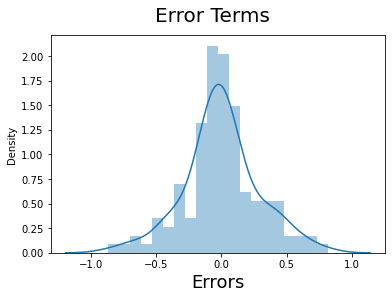

In [76]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Yes ! The error terms are in a nice normal distribution, though not perfect.

### 6. Making Predictions

##### Let us predict test set using the model. 

First we have to apply the standard scaler (that we fit to the train set ) to the test data

In [77]:
test_set[numerical_vars] = scaler.transform(test_set[numerical_vars])

In [78]:
test_set.shape

(59, 63)

#### Dividing into X_test and y_test

In [79]:
y_test = test_set.pop('price')
X_test = test_set

In [80]:
X_test.shape

(59, 62)

In [81]:
y_test

11     0.808272
177   -0.195501
93    -0.884899
68     2.810338
118   -1.199097
173   -0.602173
15     3.254495
165   -0.540288
172    0.939822
105    1.298755
43    -0.984622
89    -1.212005
91    -1.008669
131   -0.434730
122   -0.838927
109    0.015261
168   -0.479995
163   -0.759538
159   -0.807278
175   -0.418287
96    -0.858377
182   -0.809576
156   -0.957569
134    0.474978
77    -1.090003
161   -0.706494
90    -0.929102
34    -0.923798
98    -0.725766
33    -1.029886
83     0.444743
124    0.072549
50    -1.265756
7      1.161017
151   -1.063658
184   -0.770677
61    -0.310960
167   -0.690403
85    -0.948552
123   -0.606947
201    1.183118
81    -0.681563
1      0.733127
100   -0.495908
180    0.589907
179    0.644366
69     2.797607
130   -0.540819
190   -0.419701
28    -0.606947
157   -0.911598
120   -1.082931
164   -0.727711
63    -0.275598
42    -0.355164
97    -0.769970
107   -0.080218
160   -0.816118
46    -0.230864
Name: price, dtype: float64

##### Use only the significant features that we narrowed down finally when we built the model above

In [82]:
# Creating X_test_new dataframe by dropping unnecessary features from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [83]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

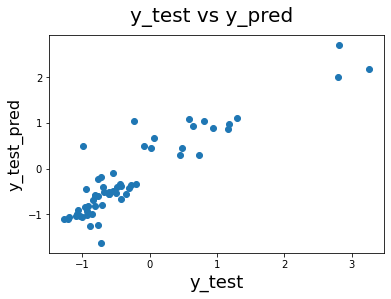

In [84]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [85]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.8237868205393468

##### There seems to be significant gap between R2 of train set (0.918) and test set (0.82).  This might be a overfit on train set.
##### Let us see if there is high correlation between the selected features and try to drop few more features.


In [86]:
X_train_new.columns

Index(['curbweight', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche',
       'CarName_saab', 'carbody_hardtop', 'carbody_wagon', 'drivewheel_rwd'],
      dtype='object')

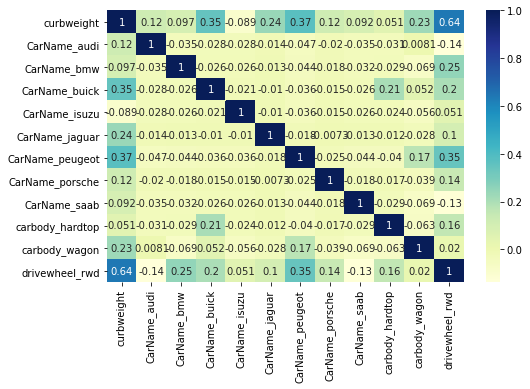

In [87]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(car[X_train_new.columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

##### Try dropping further from the predictor variables with higher correlation. In this case, we will drop  drivewheel_rwd which seems to have high collinearity with curbweight.

In [88]:
# Drop drivewheel_rwd which had  VIF > 2 and also high correlation with curbweight
X = X.drop('drivewheel_rwd',axis=1)

Build model again with reduced feature set

In [89]:
X_train_lm2 = sm.add_constant(X)
X_train_lm2.columns

Index(['const', 'curbweight', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche',
       'CarName_saab', 'carbody_hardtop', 'carbody_wagon'],
      dtype='object')

In [90]:
lm2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     95.82
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           7.60e-55
Time:                        22:11:50   Log-Likelihood:                -39.106
No. Observations:                 135   AIC:                             102.2
Df Residuals:                     123   BIC:                             137.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0447      0.038     

##### Observations

R-squared:                       0.895
Adj. R-squared:                  0.886

##### R2 and Adj-R2 has reduced from previous model. But still look very good. 

CarName_saab and carbody_hardtop have high p-values.

Let us check the VIF values

In [91]:
X_train_new = X_train_lm2.drop('const',axis=1)

In [92]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.62
6,CarName_peugeot,1.26
3,CarName_buick,1.13
5,CarName_jaguar,1.12
10,carbody_wagon,1.09
4,CarName_isuzu,1.04
7,CarName_porsche,1.03
1,CarName_audi,1.02
2,CarName_bmw,1.01
8,CarName_saab,1.01


##### VIF values are looking fine. Let us drop CarName_saab which has high p-value

In [93]:
X = X.drop('CarName_saab', axis=1)

Build model again with reduced feature set

In [94]:
X_train_lm2 = sm.add_constant(X)
X_train_lm2.columns

Index(['const', 'curbweight', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche',
       'carbody_hardtop', 'carbody_wagon'],
      dtype='object')

In [95]:
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [96]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     105.0
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.40e-55
Time:                        22:11:50   Log-Likelihood:                -39.836
No. Observations:                 135   AIC:                             101.7
Df Residuals:                     124   BIC:                             133.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0320      0.037     

##### Observations

carbody_hardtop has high p-value of 0.217.

Let us check VIF again

In [97]:
X_train_new = X_train_lm2.drop('const',axis=1)

In [98]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.60
6,CarName_peugeot,1.26
3,CarName_buick,1.13
5,CarName_jaguar,1.12
9,carbody_wagon,1.09
4,CarName_isuzu,1.04
7,CarName_porsche,1.03
1,CarName_audi,1.02
2,CarName_bmw,1.01
8,carbody_hardtop,1.00


##### VIF values are looking fine. Let us drop carbody_hardtop which has high p-value

In [99]:
X = X.drop('carbody_hardtop', axis=1)

Build model again with reduced feature set

In [100]:
X_train_lm2 = sm.add_constant(X)
X_train_lm2.columns

Index(['const', 'curbweight', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche',
       'carbody_wagon'],
      dtype='object')

In [101]:
lm2 = sm.OLS(y_train, X_train_lm2).fit()


In [102]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.68e-56
Time:                        22:11:50   Log-Likelihood:                -40.668
No. Observations:                 135   AIC:                             101.3
Df Residuals:                     125   BIC:                             130.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0375      0.037     -1.023      0.308      -0.110       0.035
curbweight          0.8242      0.039     20.975      0.000       0.746       0.902
CarName_audi        0.5646      0.147      3.853      0.000       0.275       0.855
CarName_bmw         1.1853      0.176      6.745      0.000       0.837       1.533
CarName_buick       1.0059      0.264      3.814      0.000       0.484       1.528
CarName_isuzu       0.5275      0.246      2.144      0.034       0.041       1.015
CarName_jaguar      0.9304      0.368      2.527      0.013       0.202       1.659
CarName_peugeot    -0.3513      0.134     -2.614      0.010      -0.617      -0.085
CarName_porsche     1.6525      0.249      6.630      0.000       1.159       2.146
carbody_wagon      -0.4237      0.094     -4.528      0.000      -0.609      -0.239
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                8.602
Skew:                           0.211   Prob(JB):                       0.0136
Kurtosis:                       4.162   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observations

R-squared: 0.893
Adj R-squared: 0.885
    

##### R2 and Adj-R2 look very good and p-values are all within control.
Let us check the VIF values.


In [103]:
X_train_new = X_train_lm2.drop('const',axis=1)


In [104]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,1.60
6,CarName_peugeot,1.26
3,CarName_buick,1.13
5,CarName_jaguar,1.12
8,carbody_wagon,1.09
4,CarName_isuzu,1.04
7,CarName_porsche,1.03
1,CarName_audi,1.02
2,CarName_bmw,1.01


##### VIF values are also fine < 5

##### Let us check the correlation heatmap again for the reduced feature set

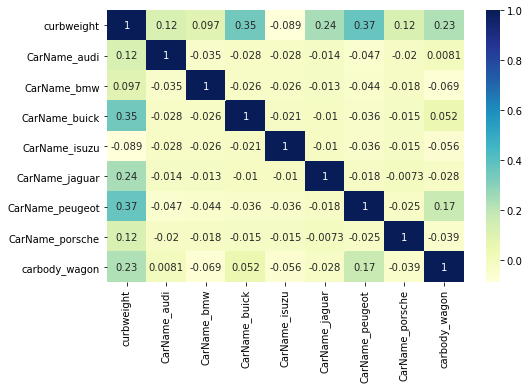

In [105]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(car[X_train_new.columns].corr(), cmap="YlGnBu", annot=True)
plt.show()



#### The correlations are also looking fine with no high correlations. So let us predict test set using this model

In [106]:
# Creating X_test_new dataframe by dropping unnecessary features from X_test
X_test_new = X_test[X_train_new.columns]

In [107]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [108]:
# Making predictions
y_test_pred = lm2.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

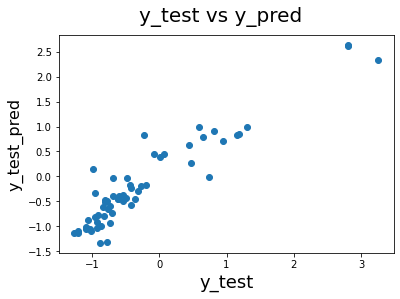

In [109]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [110]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8689886543628661

### 7. Conclusion

##### Test R2 looks good at 0.87 which is much closer to R2 on train set that is 0.89.

##### So, we built a good model which performs very well both on train and test sets, with the following features

In [112]:
X_train_new.columns

Index(['curbweight', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_peugeot', 'CarName_porsche',
       'carbody_wagon'],
      dtype='object')